In [5]:
import pandas as pd
import numpy as np
import struct

In [9]:
from tensorflow.keras.datasets import mnist 

(x_train, y_train),(x_test, y_test)= mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [11]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train= x_train.astype('float32')/ 255.0
y_train= y_train.astype('float32')/ 255.0
print(x_train.min(), x_train.max())

0.0 1.0


In [15]:
x_train= x_train.reshape(-1,28,28,1)
x_test= x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape )

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [17]:
#CNNs expect 4D: (batch, height, width, channels)
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=10)

In [19]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [21]:
x_train= x_train /255.0
x_test= x_test /255.0
print(x_train, x_test)


[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

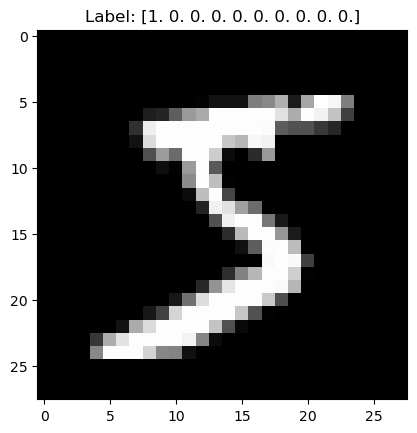

In [23]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    MaxPooling2D((2,2)),                                         
    Flatten(),                                                    
    Dense(128, activation='relu'),                                
    Dense(10, activation='softmax')                               
])

model.summary()


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from keras.utils import to_categorical 
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [59]:
print(y_train.shape)
print(y_test.shape)


(60000, 10, 10)
(10000, 10)


In [61]:
y_train_int = np.argmax(y_train, axis=1) 
y_test_int  = np.argmax(y_test, axis=1) 


In [65]:
y_train_int = np.argmax(y_train, axis=1).flatten()  # shape -> (60000,)
y_test_int  = np.argmax(y_test, axis=1).flatten()   # shape -> (10000,)

y_train_one_hot = to_categorical(y_train_int, num_classes=10)  # shape -> (60000, 10)
y_test_one_hot  = to_categorical(y_test_int, num_classes=10)   # shape -> (10000, 10)

print(y_train_one_hot.shape, y_test_one_hot.shape)


(600000, 10) (10000, 10)


In [71]:
print("y_train.shape before any processing:", y_train.shape)


y_train.shape before any processing: (60000, 10, 10)


In [75]:
import numpy as np
from keras.utils import to_categorical


y_train_int = np.argmax(y_train.reshape(60000, -1), axis=1)  # shape -> (60000,)
y_test_int  = np.argmax(y_test, axis=1)                       # shape -> (10000,)

y_train_one_hot = to_categorical(y_train_int, num_classes=10)  # shape -> (60000, 10)
y_test_one_hot  = to_categorical(y_test_int, num_classes=10)   # shape -> (10000, 10)

print(y_train_one_hot.shape, y_test_one_hot.shape)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, 
    y_train_one_hot, 
    epochs=5, 
    batch_size=64, 
    validation_data=(x_test, y_test_one_hot)
)

(60000, 10) (10000, 10)
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9765 - loss: 0.1948 - val_accuracy: 0.1135 - val_loss: 68.3434
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 1.0000 - loss: 1.0648e-04 - val_accuracy: 0.1135 - val_loss: 74.6256
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 1.0000 - loss: 3.2546e-05 - val_accuracy: 0.1135 - val_loss: 78.5920
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 1.0000 - loss: 1.4051e-05 - val_accuracy: 0.1135 - val_loss: 81.6991
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 1.0000 - loss: 6.9820e-06 - val_accuracy: 0.1135 - val_loss: 84.3790


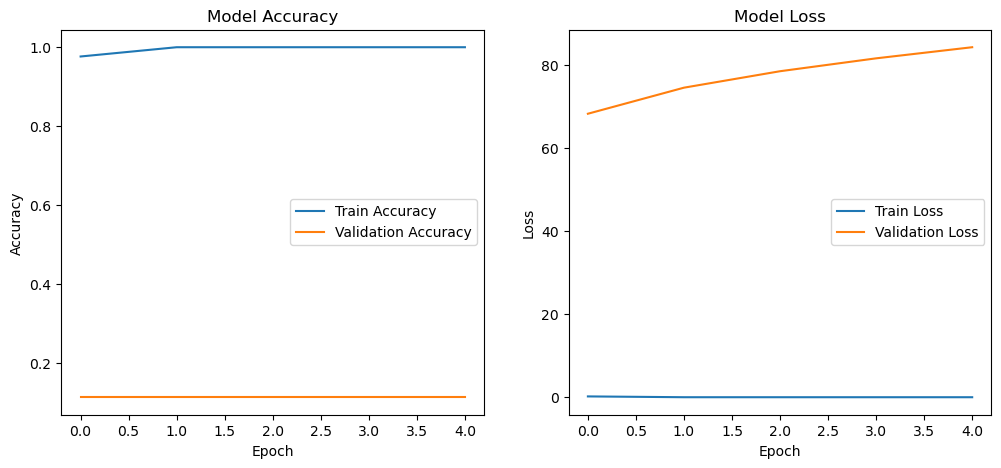

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [81]:
model.save("my_model.h5")

from keras.models import load_model
model = load_model("my_model.h5")
